In [ ]:
from mace.calculators import mace_mp
from ase import build

from ase.md import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase import units
from ase import io
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",       
    "font.size": 12,              
    "axes.labelsize": 14,         
    "axes.titlesize": 16,         
    "xtick.labelsize": 12,        
    "ytick.labelsize": 12,       
    "legend.fontsize": 12,      
    "text.usetex": True       
})


macemp0 = mace_mp(dispersion=True, default_dtype="float64", model="medium")
macemp = mace_mp(dispersion=True, default_dtype="float64")
macemp_omat = mace_mp(model="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/mace-omat-0-medium.model", dispersion=True, default_dtype="float64")

Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/20231203mace128L1_epoch199model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using TorchDFTD3Calculator for D3 dispersion corrections
Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as model argument
Using Materials Project MACE for MACECalculator with /Users/joehart/.cache/mace/macempa0mediummodel
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using TorchDFTD3Calculator for D3 dispersion corrections
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/MACE-MP-0/Notebooks_mace/mace_test/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using TorchDFTD3Calculator for D3 dispersion corrections


- find paper that uses mace for phonons and see how they talk about it 

- look at: https://hiphive.materialsmodeling.org/advanced_topics/rotational_sum_rules.html

In [9]:
from ase.visualize import view
mxene_unit = io.read("mxene_unit.xyz")
view(mxene_unit, viewer='x3d')

In [ ]:
from ase.optimize import BFGS
from ase.build import add_vacuum

add_vacuum(mxene_unit, 30.0)

mxene_unit_mace = mxene_unit.copy()
mxene_unit_omat = mxene_unit.copy()

mxene_unit_mace.calc = macemp
mxene_unit_omat.calc = macemp_omat



In [33]:
optimiser = BFGS(mxene_unit_mace)
optimiser.run(fmax=0.0001) 

      Step     Time          Energy          fmax
BFGS:    0 20:05:31      -22.060948        1.109804
BFGS:    1 20:05:31      -22.101255        1.147950
BFGS:    2 20:05:31      -22.690289        1.703144
BFGS:    3 20:05:31      -23.463215        2.354899
BFGS:    4 20:05:31      -24.473181        3.030360
BFGS:    5 20:05:32      -25.747521        3.563458
BFGS:    6 20:05:32      -27.278996        4.097895
BFGS:    7 20:05:32      -29.155113        4.737531
BFGS:    8 20:05:32      -31.475921        5.409999
BFGS:    9 20:05:32      -34.193667        5.418499
BFGS:   10 20:05:32      -36.339102        3.287227
BFGS:   11 20:05:32      -37.125345        1.153212
BFGS:   12 20:05:33      -37.232873        1.562688
BFGS:   13 20:05:33      -37.658437        2.716427
BFGS:   14 20:05:33      -38.139781        3.813888
BFGS:   15 20:05:33      -38.590578        4.608378
BFGS:   16 20:05:33      -38.965469        5.086799
BFGS:   17 20:05:33      -39.340069        5.543421
BFGS:   18 20:

True

In [ ]:
optimiser = BFGS(mxene_unit_omat)
optimiser.run(fmax=0.0001) 

      Step     Time          Energy          fmax
BFGS:    0 19:52:25      -21.736588        1.373303
BFGS:    1 19:52:25      -21.791331        1.417086
BFGS:    2 19:52:25      -22.459076        1.910915
BFGS:    3 19:52:26      -23.360504        2.480044
BFGS:    4 19:52:26      -24.556408        3.150714
BFGS:    5 19:52:26      -26.174777        4.093520
BFGS:    6 19:52:26      -28.463393        5.299871
BFGS:    7 19:52:26      -31.383938        5.661777
BFGS:    8 19:52:27      -34.168865        4.461769
BFGS:    9 19:52:27      -35.929944        2.139687
BFGS:   10 19:52:27      -36.262999        1.004369
BFGS:   11 19:52:28      -36.296401        0.626684
BFGS:   12 19:52:28      -36.317930        0.456016
BFGS:   13 19:52:28      -36.414455        0.965998
BFGS:   14 19:52:29      -36.642677        1.798029
BFGS:   15 19:52:29      -36.874327        2.597332
BFGS:   16 19:52:29      -37.119422        3.375188
BFGS:   17 19:52:30      -37.376477        4.174395
BFGS:   18 19:

True

In [ ]:
io.write("relax_mxene_unit_mace.xyz", mxene_unit_mace)
io.write("relax_mxene_unit_omat.xyz", mxene_unit_omat)

In [376]:
relaxed_mxene_unit_mace = io.read("structures/relax_mxene_unit_mace.xyz")
relaxed_mxene_unit_omat = io.read("structures/relax_mxene_unit_omat.xyz")

In [36]:
view(relaxed_mxene_unit_mace, viewer='x3d')

In [458]:
from ase.phonons import Phonons
from ase.dft.kpoints import bandpath
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec


special_points = {
    'Γ': [0.0, 0.0, 0.0],   # Gamma
    'M': [0.5, 0.0, 0.0],   # M point
    'K': [1/3, 1/3, 0.0],   # K point
}

npoints = 300   # Number of points in the band structure
delta = 0.05

path_segments = ['Γ', 'M', 'K', 'Γ']
path_labels = ['Γ', 'M', 'K', 'Γ']

### MACE-MP-0

In [460]:
relaxed_mxene_unit_macemp0 = io.read("structures/mxene_unit_relaxed_macemp0.xyz")
relaxed_mxene_unit_macemp0.calc = macemp0
ph_mace = Phonons(relaxed_mxene_unit_macemp0, macemp, supercell=(4, 4, 1), delta=delta)
ph_mace.clean() 
ph_mace.run()
ph_mace.read(acoustic=True)

path_mace = bandpath(path_segments, relaxed_mxene_unit_macemp0.cell, npoints=npoints, special_points=special_points)
bands_mace = ph_mace.get_band_structure(path_mace)
frequencies_mace = bands_mace.energies.T

dos_mace = ph_mace.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

WARNING, 3 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 9.827e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.421e-02*i)
WARNING, 2 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.202e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.733e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.00,  0.00) ; (omega_q = 4.137e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.00,  0.00) ; (omega_q = 4.471e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.766e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.039e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 5.299e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 5.549e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05,  0.00,  0.00) ; (omega_q = 5.789e-02*i)
WARNING, 1 imaginary frequencies

<Axes: ylabel='energies [eV]'>

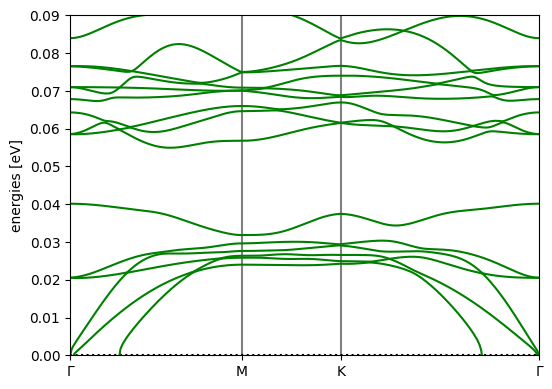

In [461]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.09
# Convert eV to cm^-1
#emax = 0.08 * 8065.544

bands_mace.plot(ax=ax, emin=0.0, emax=emax)

### MACE-MPA-0

In [457]:



# Run phonon calculation with ASE
relaxed_mxene_unit_mace.calc = macemp
ph_mace = Phonons(relaxed_mxene_unit_mace, macemp, supercell=(4, 4, 1), delta=delta)
ph_mace.clean() 
ph_mace.run()
ph_mace.read(acoustic=True)

path_mace = bandpath(path_segments, relaxed_mxene_unit_mace.cell, npoints=npoints, special_points=special_points)
bands_mace = ph_mace.get_band_structure(path_mace)
frequencies_mace = bands_mace.energies.T

dos_mace = ph_mace.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
for i in range(frequencies_mace.shape[0]):
    ax.plot(np.linspace(0, 1, npoints), frequencies_mace[i], color='tab:blue', lw=1)

ax.axhline(y=0.0, ls='-', c='k', lw=1.0)
ax.set_xticks(np.linspace(0, 1, len(path_labels)))
ax.set_xticklabels(path_labels)
ax.set_ylabel('Frequency (THz)')
ax.set_title('Phonon Dispersion (Rotational Sum Rules Enforced)')

plt.show()

In [ ]:
from ase.phonons import Phonons
from ase.dft.kpoints import bandpath
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec


special_points = {
    'Γ': [0.0, 0.0, 0.0],   # Gamma
    'M': [0.5, 0.0, 0.0],   # M point
    'K': [1/3, 1/3, 0.0],   # K point
}

npoints = 300   # Number of points in the band structure
delta = 0.05

path_segments = ['Γ', 'M', 'K', 'Γ']
path_labels = ['Γ', 'M', 'K', 'Γ']

relaxed_mxene_unit_mace.calc = macemp
ph_mace = Phonons(relaxed_mxene_unit_mace, macemp, supercell=(8, 8, 1), delta=delta)
ph_mace.clean() 
ph_mace.run()
ph_mace.read(acoustic=True)

# Define the path through the Brillouin zone
path_mace = bandpath(path_segments, relaxed_mxene_unit_mace.cell, npoints=npoints, special_points=special_points)
bands_mace = ph_mace.get_band_structure(path_mace)
frequencies_mace = bands_mace.energies.T

dos_mace = ph_mace.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.694e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.679e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.039e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.331e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.00,  0.00) ; (omega_q = 4.478e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.00,  0.00) ; (omega_q = 4.289e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.392e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.02,  0.00) ; (omega_q = 3.805e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.02,  0.00) ; (omega_q = 6.055e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.02,  0.00) ; (omega_q = 6.855e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.02,  0.00) ; (omega_q = 6.970e-03*i)
WARNING, 1 imaginary frequencies

Text(0.5, 0, 'DOS')

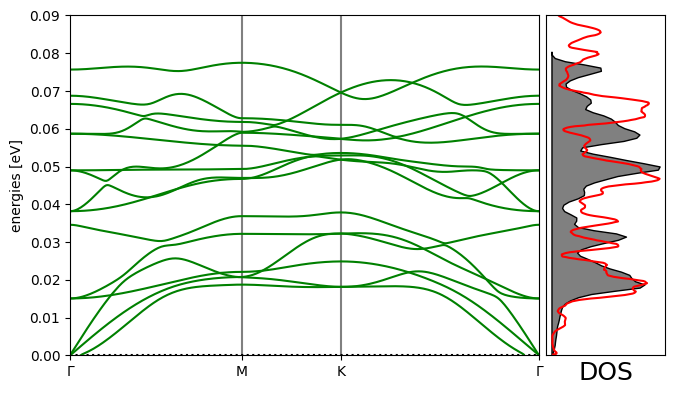

In [ ]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.09
# Convert eV to cm^-1
#emax = 0.08 * 8065.544

bands_mace.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos_mace.get_weights(), dos_mace.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.plot(total_DOS_scaled, common_y, color='red', lw=1.5, label="Phonon DOS")

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

### MACE-OMAT

In [ ]:
relaxed_mxene_unit_omat = io.read("structures/relax_mxene_unit_omat.xyz")
relaxed_mxene_unit_omat.calc = macemp_omat
ph_omat = Phonons(relaxed_mxene_unit_omat, macemp_omat, supercell=(8, 8, 1), delta=delta)
ph_omat.clean()
ph_omat.run()
ph_omat.read(acoustic=True)


# Define the path through the Brillouin zone
path_omat = bandpath(path_segments, relaxed_mxene_unit_omat.cell, npoints=npoints, special_points=special_points)
bands_omat = ph_omat.get_band_structure(path_omat)
frequencies_omat = bands_omat.energies.T

dos_omat = ph_omat.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

WARNING, 3 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.384e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 8.530e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.852e-04*i)
WARNING, 3 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.384e-03*i)


In [ ]:
# tollerance for imaginary frequencies in mp0 paper: 0.1 THz = 0.1 * 4.135667696e-3 = 4.135667696e-4 eV

Text(0.5, 0, 'DOS')

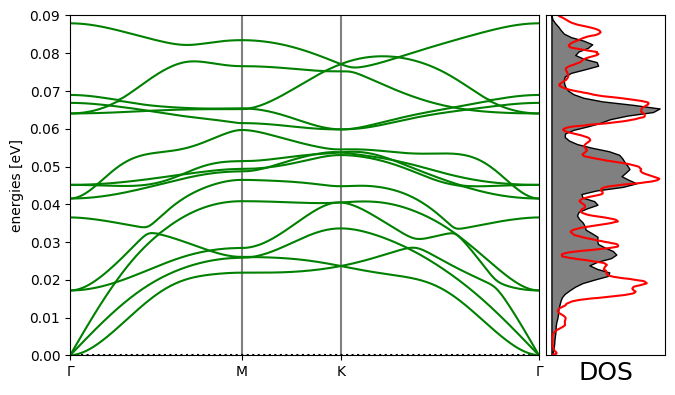

In [127]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.09
# Convert eV to cm^-1
#emax = 0.08 * 8065.544

bands_omat.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos_omat.get_weights(), dos_omat.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)
dosax.plot(total_DOS_scaled, common_y, color='red', lw=1.5, label="Phonon DOS")

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

In [76]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import glob

# load all ph_mode files (extracted with plot digitiser)
file_pattern = "reference_ph_modes/ph_mode*.json"
files = sorted(glob.glob(file_pattern), key=lambda x: int(x.split("ph_mode")[-1].split(".json")[0]))

data = []

for file in files:
    with open(file, 'r') as f:
        data.append(json.load(f))

values_x = []
values_y = []

for dat in data:
    values_x.append([i['value'][0] for i in dat['datasetColl'][0]['data']])
    values_y.append([i['value'][1] for i in dat['datasetColl'][0]['data']])

x_min = [min(band) for band in values_x]
x_max = [max(band) for band in values_x]
    
# normalise x_min and x_max to [0, npoints]

# Normalize to range [0, npoints]
x_norm = [
    [(x - band_min) / (band_max - band_min) * npoints for x in band]
    for band, band_min, band_max in zip(values_x, x_min, x_max)
]


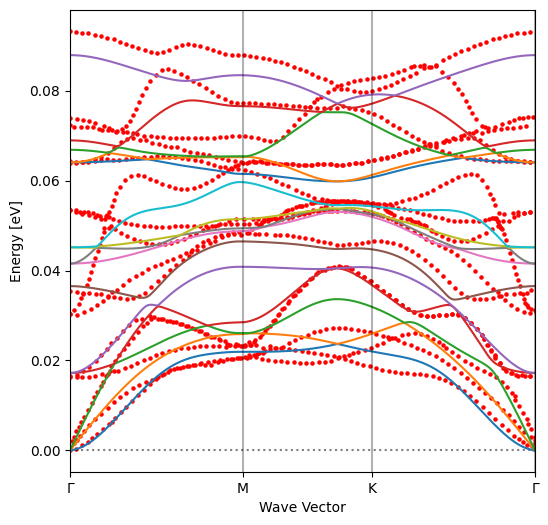

In [77]:
fig = plt.figure(figsize=(6, 6))

plt.ylabel('Energy [eV]')
plt.xlabel('Wave Vector')
plt.axhline(y=0, color='k', ls=':', alpha=0.5)
for freq in frequencies_omat:
    plt.plot(range(npoints), freq)



# Add vertical lines and ticks for special points
# Calculate x_positions for special points along the path
x_positions = [0]
for i in range(len(path_segments) - 1):
    k1 = special_points[path_segments[i]]
    k2 = special_points[path_segments[i + 1]]
    x_positions.append(x_positions[-1] + np.linalg.norm(np.array(k1) - np.array(k2)))
x_positions = np.array(x_positions) * (npoints - 1) / max(x_positions)


ax = plt.gca()
ax.set_xticks(x_positions)
ax.set_xticklabels(path_labels)



for x in x_positions:
    plt.axvline(x, color='k', ls='-', alpha=0.3)


# Adjust plot limits
plt.xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])  # Extracted phonon frequencies (THz)
    extracted_y_eV = extracted_y * 4.135667696e-3  # Convert THz to eV

    plt.scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)


In [65]:
x_positions

array([  0.        , 111.22829001, 194.1329625 , 299.        ])

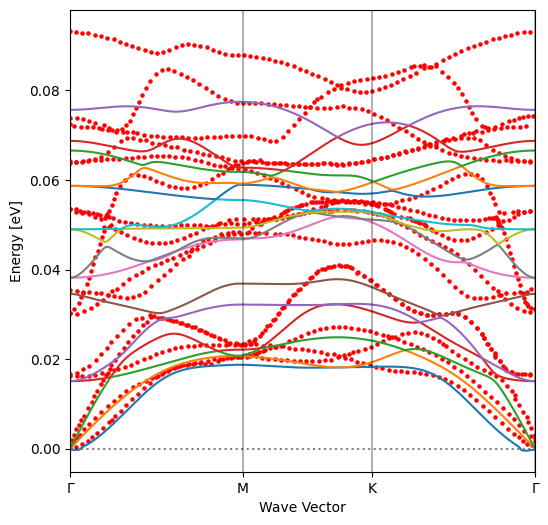

In [78]:
fig = plt.figure(figsize=(6, 6))

plt.ylabel('Energy [eV]')
plt.xlabel('Wave Vector')
plt.axhline(y=0, color='k', ls=':', alpha=0.5)
for freq in frequencies_mace:
    plt.plot(range(npoints), freq)



# Add vertical lines and ticks for special points
# Calculate x_positions for special points along the path
x_positions = [0]
for i in range(len(path_segments) - 1):
    k1 = special_points[path_segments[i]]
    k2 = special_points[path_segments[i + 1]]
    x_positions.append(x_positions[-1] + np.linalg.norm(np.array(k1) - np.array(k2)))
# normalize x_positions to match the number of points
x_positions = np.array(x_positions) * (npoints - 1) / max(x_positions)


ax = plt.gca()
ax.set_xticks(x_positions)
ax.set_xticklabels(path_labels)



for x in x_positions:
    plt.axvline(x, color='k', ls='-', alpha=0.3)


# Adjust plot limits
plt.xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])  # Extracted phonon frequencies (THz)
    extracted_y_eV = extracted_y * 4.135667696e-3  # Convert THz to eV

    plt.scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)

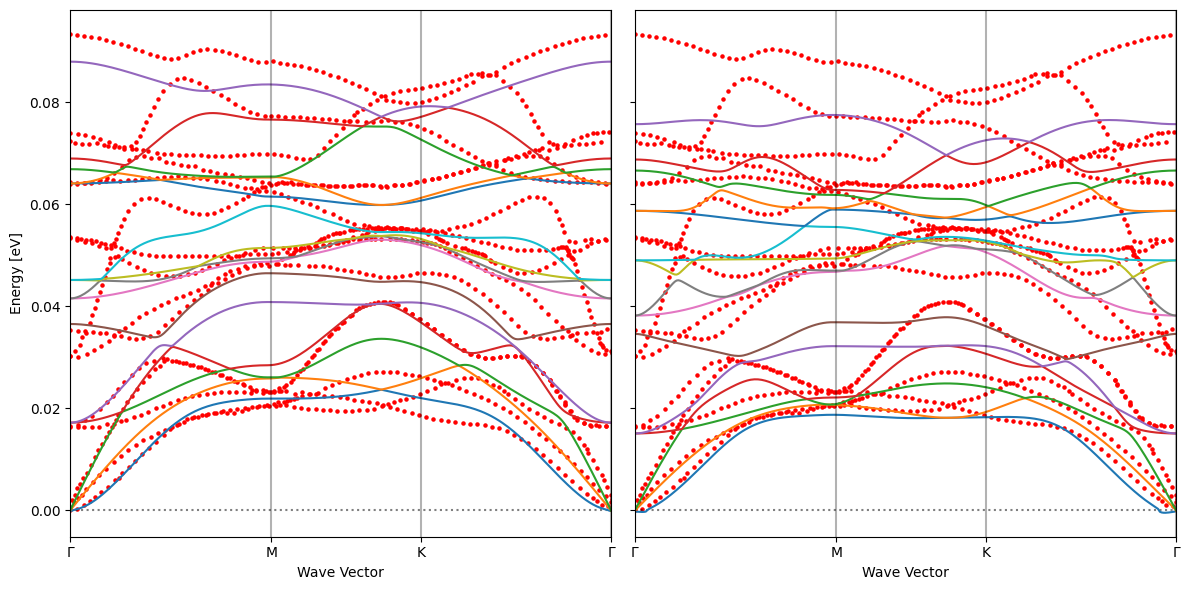

In [ ]:

x_positions = [0]
for i in range(len(path_segments) - 1):
    k1 = special_points[path_segments[i]]
    k2 = special_points[path_segments[i + 1]]
    x_positions.append(x_positions[-1] + np.linalg.norm(np.array(k1) - np.array(k2)))
x_positions = np.array(x_positions) * (npoints - 1) / max(x_positions)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot first subfigure
axes[0].set_ylabel('Energy [eV]')
axes[0].set_xlabel('Wave Vector')
axes[0].axhline(y=0, color='k', ls=':', alpha=0.5)
for freq in frequencies_omat:
    axes[0].plot(range(npoints), freq)

axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(path_labels)
for x in x_positions:
    axes[0].axvline(x, color='k', ls='-', alpha=0.3)
axes[0].set_xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])
    extracted_y_eV = extracted_y * 4.135667696e-3
    axes[0].scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)

# Plot second subfigure
axes[1].set_xlabel('Wave Vector')
axes[1].axhline(y=0, color='k', ls=':', alpha=0.5)
for freq in frequencies_mace:
    axes[1].plot(range(npoints), freq)

axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(path_labels)
for x in x_positions:
    axes[1].axvline(x, color='k', ls='-', alpha=0.3)
axes[1].set_xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])
    extracted_y_eV = extracted_y * 4.135667696e-3
    axes[1].scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)

axes[0].set_title("MACE-OMAT-0")
axes[1].set_title("MACE-MP-0")

plt.tight_layout()
plt.show()


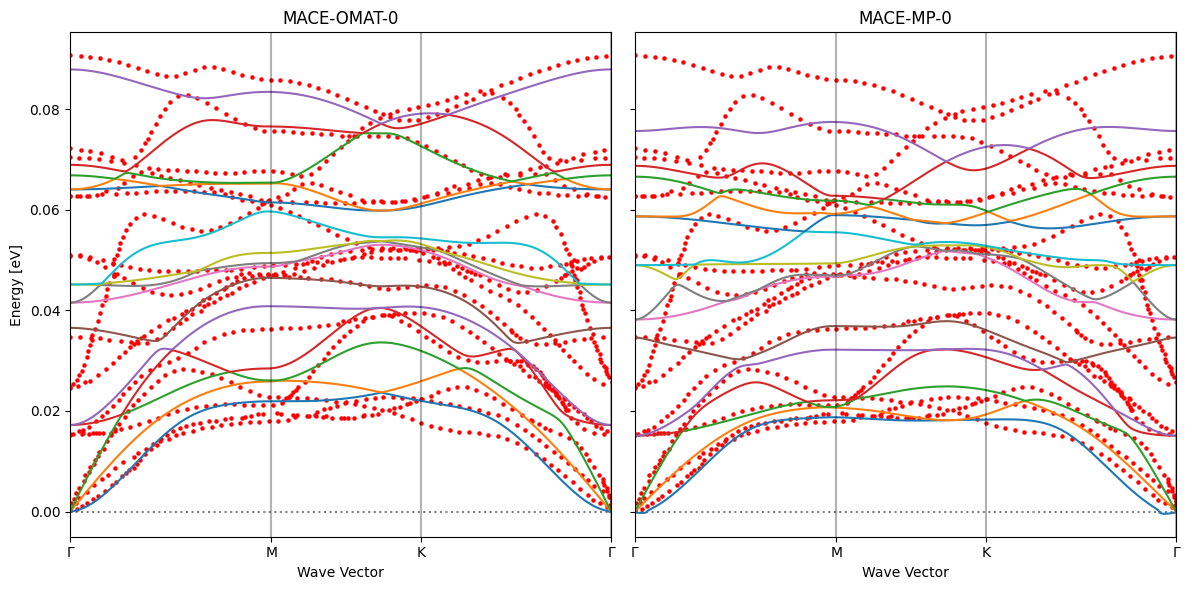

In [225]:

x_positions = [0]
for i in range(len(path_segments) - 1):
    k1 = special_points[path_segments[i]]
    k2 = special_points[path_segments[i + 1]]
    x_positions.append(x_positions[-1] + np.linalg.norm(np.array(k1) - np.array(k2)))
x_positions = np.array(x_positions) * (npoints - 1) / max(x_positions)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot first subfigure
axes[0].set_ylabel('Energy [eV]')
axes[0].set_xlabel('Wave Vector')
axes[0].axhline(y=0, color='k', ls=':', alpha=0.5)
for freq in frequencies_omat:
    axes[0].plot(range(npoints), freq)

axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(path_labels)
for x in x_positions:
    axes[0].axvline(x, color='k', ls='-', alpha=0.3)
axes[0].set_xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])
    extracted_y_eV = extracted_y / 8065.544
    axes[0].scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)

# Plot second subfigure
axes[1].set_xlabel('Wave Vector')
axes[1].axhline(y=0, color='k', ls=':', alpha=0.5)
for freq in frequencies_mace:
    axes[1].plot(range(npoints), freq)

axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(path_labels)
for x in x_positions:
    axes[1].axvline(x, color='k', ls='-', alpha=0.3)
axes[1].set_xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])
    extracted_y_eV = extracted_y / 8065.544
    axes[1].scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)

axes[0].set_title("MACE-OMAT-0")
axes[1].set_title("MACE-MP-0")

plt.tight_layout()
plt.show()


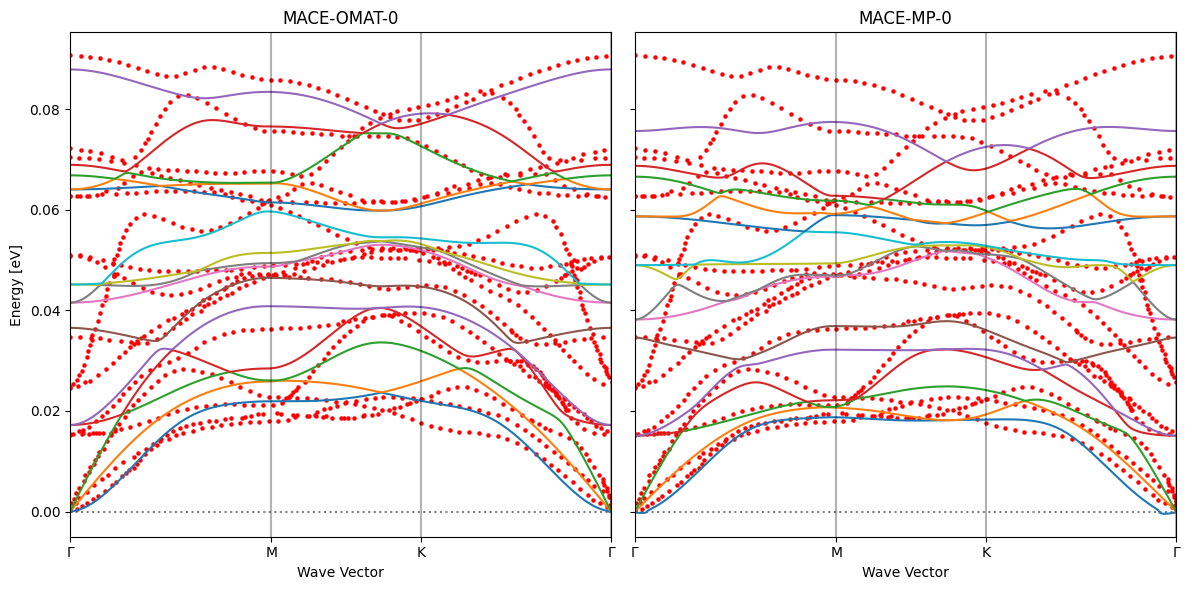

In [233]:

x_positions = [0]
for i in range(len(path_segments) - 1):
    k1 = special_points[path_segments[i]]
    k2 = special_points[path_segments[i + 1]]
    x_positions.append(x_positions[-1] + np.linalg.norm(np.array(k1) - np.array(k2)))
x_positions = np.array(x_positions) * (npoints - 1) / max(x_positions)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot first subfigure
axes[0].set_ylabel('Energy [eV]')
axes[0].set_xlabel('Wave Vector')
axes[0].axhline(y=0, color='k', ls=':', alpha=0.5)
for freq in frequencies_omat:
    axes[0].plot(range(npoints), freq)

axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(path_labels)
for x in x_positions:
    axes[0].axvline(x, color='k', ls='-', alpha=0.3)
axes[0].set_xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])
    extracted_y_eV = extracted_y / 8065.544
    axes[0].scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)

# Plot second subfigure
axes[1].set_xlabel('Wave Vector')
axes[1].axhline(y=0, color='k', ls=':', alpha=0.5)
for freq in frequencies_mace:
    axes[1].plot(range(npoints), freq)

axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(path_labels)
for x in x_positions:
    axes[1].axvline(x, color='k', ls='-', alpha=0.3)
axes[1].set_xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])
    extracted_y_eV = extracted_y / 8065.544
    axes[1].scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)

axes[0].set_title("MACE-OMAT-0")
axes[1].set_title("MACE-MP-0")

plt.tight_layout()
plt.show()

In [331]:
data_dos = {}
with open("reference_ph_modes/dos_C.json", 'r') as f:
    data_dos["C"] = json.load(f)
with open("reference_ph_modes/dos_Ti.json", 'r') as f:
    data_dos["Ti"] = json.load(f)
with open("reference_ph_modes/dos_O.json", 'r') as f:
    data_dos["O"] = json.load(f)

In [332]:
C_x = [i['value'][0] for i in data_dos["C"]['datasetColl'][0]['data']]
C_y = [i['value'][1] for i in data_dos["C"]['datasetColl'][0]['data']]
Ti_x = [i['value'][0] for i in data_dos["Ti"]['datasetColl'][0]['data']]
Ti_y = [i['value'][1] for i in data_dos["Ti"]['datasetColl'][0]['data']]
O_x = [i['value'][0] for i in data_dos["O"]['datasetColl'][0]['data']]
O_y = [i['value'][1] for i in data_dos["O"]['datasetColl'][0]['data']]


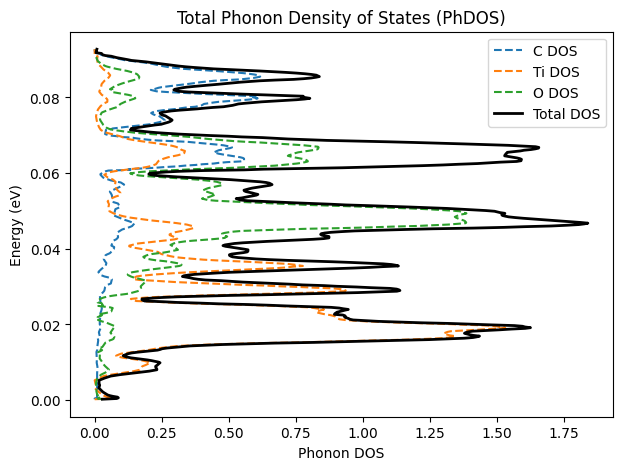

In [333]:
from scipy.interpolate import interp1d

common_y = np.linspace(min(min(C_y), min(Ti_y), min(O_y)), max(max(C_y), max(Ti_y), max(O_y)), 500)

# interpol DOS values
C_interp = interp1d(C_y, C_x, kind='linear', bounds_error=False, fill_value=0)
Ti_interp = interp1d(Ti_y, Ti_x, kind='linear', bounds_error=False, fill_value=0)
O_interp = interp1d(O_y, O_x, kind='linear', bounds_error=False, fill_value=0)

C_x_interp = C_interp(common_y)
Ti_x_interp = Ti_interp(common_y)
O_x_interp = O_interp(common_y)

total_DOS = C_x_interp + Ti_x_interp + O_x_interp

plt.figure(figsize=(7, 5))
common_y = common_y / 8065.5 # cm-1 -> eV
plt.plot(C_x_interp, common_y, label="C DOS", linestyle="--")
plt.plot(Ti_x_interp, common_y, label="Ti DOS", linestyle="--")
plt.plot(O_x_interp, common_y, label="O DOS", linestyle="--")
plt.plot(total_DOS, common_y, label="Total DOS", color="black", linewidth=2)

plt.xlabel("Phonon DOS")
plt.ylabel("Energy (eV)")
plt.legend()
plt.title("Total Phonon Density of States (PhDOS)")
plt.show()

In [334]:
ase_dos_weights = dos_mace.get_weights()
ase_dos_energies = dos_mace.get_energies()

# Compute the maximum values for normalization
ase_max = np.max(ase_dos_weights)
ref_max = np.max(total_DOS)

# Compute the scaling factor
scaling_factor = ase_max / ref_max if ref_max > 0 else 1

# Scale the reference PhDOS
total_DOS_scaled = total_DOS * scaling_factor

In [ ]:
ase_max_energy = np.max(bands_mace.energies)  # Max energy from ASE phonon bands
ref_max_energy = np.max(values_y_eV)  # Max energy from reference data

# Compute scale factor
scale_factor = ase_max_energy / ref_max_energy if ref_max_energy > 0 else 1

# Apply scaling to reference phonon energies
values_y_scaled = values_y_eV * scale_factor

Text(0.5, 0, 'DOS')

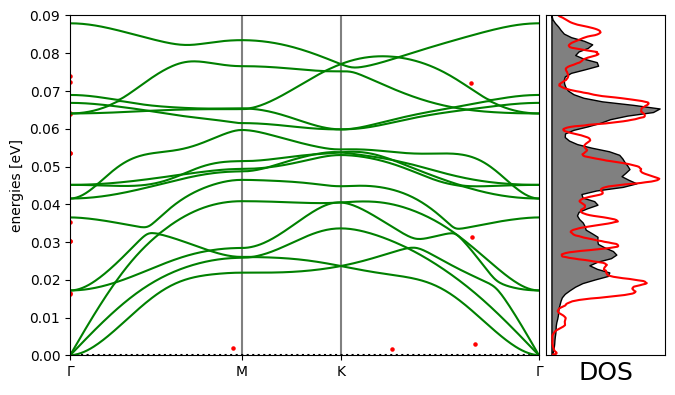

In [131]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.09
# Convert eV to cm^-1
#emax = 0.08 * 8065.544

bands_omat.plot(ax=ax, emin=0.0, emax=emax)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])  # Extracted phonon frequencies (THz)
    extracted_y_eV = extracted_y * 4.135667696e-3  # Convert THz to eV

    plt.scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos_omat.get_weights(), dos_omat.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)
dosax.plot(total_DOS_scaled, common_y, color='red', lw=1.5, label="Phonon DOS")

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

In [231]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import glob

# load all ph_mode files (extracted with plot digitiser)
file_pattern = "reference_ph_modes/2ph_mode*.json"
files = sorted(glob.glob(file_pattern), key=lambda x: int(x.split("2ph_mode")[-1].split(".json")[0]))

data = []

for file in files:
    with open(file, 'r') as f:
        data.append(json.load(f))

values_x = []
values_y = []

for dat in data:
    values_x.append([i['value'][0] for i in dat['datasetColl'][0]['data']])
    values_y.append([i['value'][1] for i in dat['datasetColl'][0]['data']])

x_min = [min(band) for band in values_x]
x_max = [max(band) for band in values_x]
    
# normalise x_min and x_max to [0, npoints]

# Normalize to range [0, npoints]
x_norm = [
    [(x - band_min) / (band_max - band_min) * npoints for x in band]
    for band, band_min, band_max in zip(values_x, x_min, x_max)
]


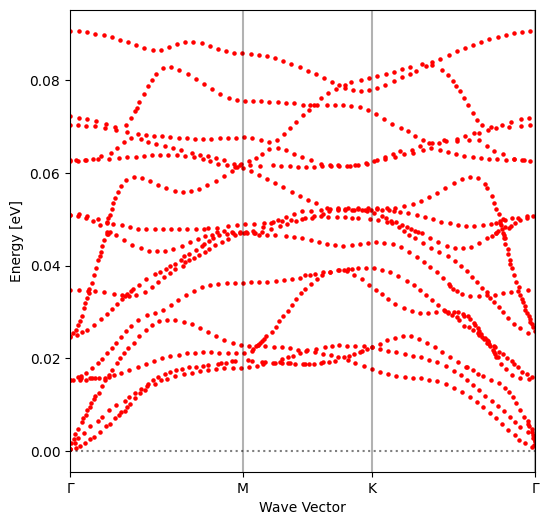

In [232]:
fig = plt.figure(figsize=(6, 6))

plt.ylabel('Energy [eV]')
plt.xlabel('Wave Vector')
plt.axhline(y=0, color='k', ls=':', alpha=0.5)
# for freq in frequencies_omat:
#     plt.plot(range(npoints), freq)



# Add vertical lines and ticks for special points
# Calculate x_positions for special points along the path
x_positions = [0]
for i in range(len(path_segments) - 1):
    k1 = special_points[path_segments[i]]
    k2 = special_points[path_segments[i + 1]]
    x_positions.append(x_positions[-1] + np.linalg.norm(np.array(k1) - np.array(k2)))
x_positions = np.array(x_positions) * (npoints - 1) / max(x_positions)


ax = plt.gca()
ax.set_xticks(x_positions)
ax.set_xticklabels(path_labels)



for x in x_positions:
    plt.axvline(x, color='k', ls='-', alpha=0.3)


# Adjust plot limits
plt.xlim(0, npoints - 1)

for mode in range(len(x_norm)):  
    extracted_y = np.array(values_y[mode])  # Extracted phonon frequencies (THz)
    extracted_y_eV = extracted_y /8065.5 # Convert cm-1 to eV

    plt.scatter(x_norm[mode], extracted_y_eV, color="red", label="Extracted Data (eV)" if mode == 0 else "", s=5)


### Graphene MP0

- literature comparison: https://pubs.rsc.org/en/content/articlepdf/2021/cp/d0cp03191g
- 

In [190]:
graphene_atoms = build.graphene(formula='C2', a=2.46, size=(1, 1, 1), vacuum=3.5)

graphene_atoms.calc = macemp0
optimiser = BFGS(graphene_atoms)
optimiser.run(fmax=0.0001) 

special_points_g = {
    'Γ': [0.0, 0.0, 0.0],   # Gamma
    'M': [0.5, 0.0, 0.0],   # M point
    'K': [1/3, 1/3, 0.0],   # K point
}

npoints = 300   # Number of points in the band structure
delta = 0.05

path_segments = ['Γ', 'M', 'K', 'Γ']
path_labels = ['Γ', 'M', 'K', 'Γ']


graphene_atoms.calc = macemp0
ph_g_macemp0 = Phonons(graphene_atoms, macemp0, supercell=(5, 5, 1), delta=delta)
ph_g_macemp0.clean() 
ph_g_macemp0.run()
ph_g_macemp0.read(acoustic=True)

# Define the path through the Brillouin zone
path_g_macemp0 = bandpath(path_segments, graphene_atoms.cell, npoints=npoints, special_points=special_points_g)
bands_g_macemp0 = ph_g_macemp0.get_band_structure(path_g_macemp0)
frequencies_g_macemp0 = bands_g_macemp0.energies.T

dos_g_macemp0 = ph_g_macemp0.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)


      Step     Time          Energy          fmax
BFGS:    0 16:37:29      -18.551065        0.000000
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.469e-08*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.223e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.434e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.621e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.00,  0.00) ; (omega_q = 8.771e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.00,  0.00) ; (omega_q = 1.087e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.291e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.488e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.675e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.852e-02*i)
WARNING, 1 imagina

Text(0.5, 0, 'DOS')

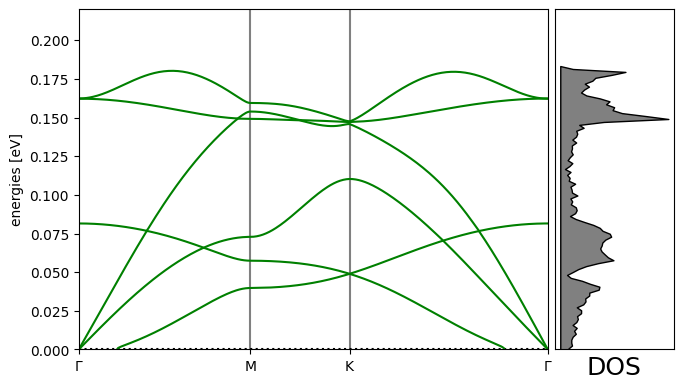

In [191]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.22

bands_g_macemp0.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos_g_macemp0.get_weights(), dos_g_macemp0.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

### Graphene - MPA

In [195]:
graphene_atoms = build.graphene(formula='C2', a=2.46, size=(1, 1, 1), vacuum=3.5)

graphene_atoms.set_calculator(macemp)
optimiser = BFGS(graphene_atoms)
optimiser.run(fmax=0.0001) 

special_points_g = {
    'Γ': [0.0, 0.0, 0.0],   # Gamma
    'M': [0.5, 0.0, 0.0],   # M point
    'K': [1/3, 1/3, 0.0],   # K point
}

npoints = 300   # Number of points in the band structure
delta = 0.05

path_segments = ['Γ', 'M', 'K', 'Γ']
path_labels = ['Γ', 'M', 'K', 'Γ']


graphene_atoms.calc = macemp
ph_g_mace = Phonons(graphene_atoms, macemp, supercell=(5, 5, 1), delta=delta)
ph_g_mace.clean() 
ph_g_mace.run()
ph_g_mace.read(acoustic=True)

# Define the path through the Brillouin zone
path_g_mace = bandpath(path_segments, graphene_atoms.cell, npoints=npoints, special_points=special_points_g)
bands_g_mace = ph_g_mace.get_band_structure(path_g_mace)
frequencies_g_mace = bands_g_mace.energies.T

dos_g_mace = ph_g_mace.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)


      Step     Time          Energy          fmax
BFGS:    0 16:42:33      -18.584879        0.000000


/var/folders/br/67qx_45113s31sykxddgpjyw0000gn/T/ipykernel_98508/3743871538.py:3: FutureWarning: Please use atoms.calc = calc
  graphene_atoms.set_calculator(macemp)


WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.032e-08*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.03,  0.00) ; (omega_q = 4.588e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.03,  0.00) ; (omega_q = 6.864e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.03,  0.00) ; (omega_q = 7.821e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.02,  0.00) ; (omega_q = 8.116e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.02,  0.00) ; (omega_q = 7.975e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.02,  0.00) ; (omega_q = 7.517e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02,  0.02,  0.00) ; (omega_q = 6.819e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.01,  0.00) ; (omega_q = 5.935e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.01,  0.00) ; (omega_q = 4.907e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.01,  0.00) ; (omega_q = 3.770e-03*i)
WARNING, 1 imaginary frequencies

Text(0.5, 0, 'DOS')

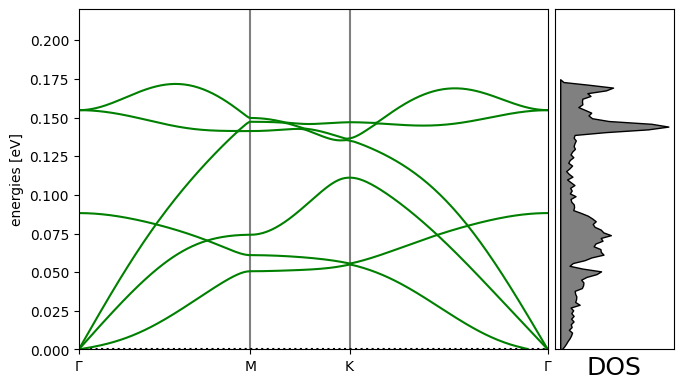

In [196]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.22

bands_g_mace.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos_g_mace.get_weights(), dos_g_mace.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

### Graphene - OMAT

In [ ]:
graphene_atoms = build.graphene(formula='C2', a=2.46, size=(1, 1, 1), vacuum=3.5)

graphene_atoms.set_calculator(macemp_omat)
optimiser = BFGS(graphene_atoms)
optimiser.run(fmax=0.0001) 

special_points_g = {
    'Γ': [0.0, 0.0, 0.0],   # Gamma
    'M': [0.5, 0.0, 0.0],   # M point
    'K': [1/3, 1/3, 0.0],   # K point
}

npoints = 300   # Number of points in the band structure
delta = 0.05

path_segments = ['Γ', 'M', 'K', 'Γ']
path_labels = ['Γ', 'M', 'K', 'Γ']


graphene_atoms.calc = macemp_omat
ph_g_omat = Phonons(graphene_atoms, macemp_omat, supercell=(5, 5, 1), delta=delta)
ph_g_omat.clean() 
ph_g_omat.run()
ph_g_omat.read(acoustic=True)

# Define the path through the Brillouin zone
path_g_omat = bandpath(path_segments, graphene_atoms.cell, npoints=npoints, special_points=special_points_g)
bands_g_omat = ph_g_omat.get_band_structure(path_g_omat)
frequencies_g_omat = bands_g_omat.energies.T

dos_g_omat = ph_g_omat.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)


      Step     Time          Energy          fmax
BFGS:    0 16:44:07      -18.586316        0.000000


/var/folders/br/67qx_45113s31sykxddgpjyw0000gn/T/ipykernel_98508/4088480047.py:3: FutureWarning: Please use atoms.calc = calc
  graphene_atoms.set_calculator(macemp_omat)


WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.432e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.432e-08*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.47) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.42) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.38) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.33) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.28) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.22) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.17) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.12) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies at q = (-0.08,  0.03, -0.08) ; (omega_q = 6.107e-03*i)
WARNING, 1 imaginary frequencies

Text(0.5, 0, 'DOS')

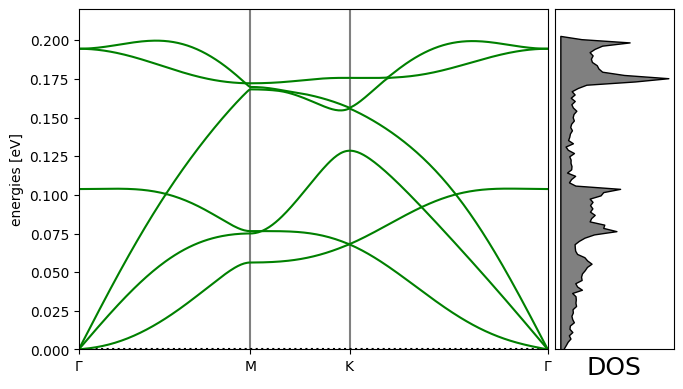

In [148]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.22

bands_g_omat.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos_g_omat.get_weights(), dos_g_omat.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

In [185]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import glob

# load all ph_mode files (extracted with plot digitiser)
file_pattern = "reference_ph_modes/graphene_ph*.json"
files = sorted(glob.glob(file_pattern), key=lambda x: int(x.split("ph_mode")[-1].split(".json")[0]))

data_graphene = []

for file in files:
    with open(file, 'r') as f:
        data_graphene.append(json.load(f))

values_x_graphene = []
values_y_graphene = []

for dat in data_graphene:
    values_x_graphene.append([i['value'][0] for i in dat['datasetColl'][0]['data']])
    values_y_graphene.append([i['value'][1] for i in dat['datasetColl'][0]['data']])

x_min = [min(band) for band in values_x_graphene]
x_max = [max(band) for band in values_x_graphene]
    
# normalise x_min and x_max to [0, npoints]

# Normalize to range [0, npoints]
x_norm = [
    [(x - band_min) / (band_max - band_min) * npoints for x in band]
    for band, band_min, band_max in zip(values_x_graphene, x_min, x_max)
]


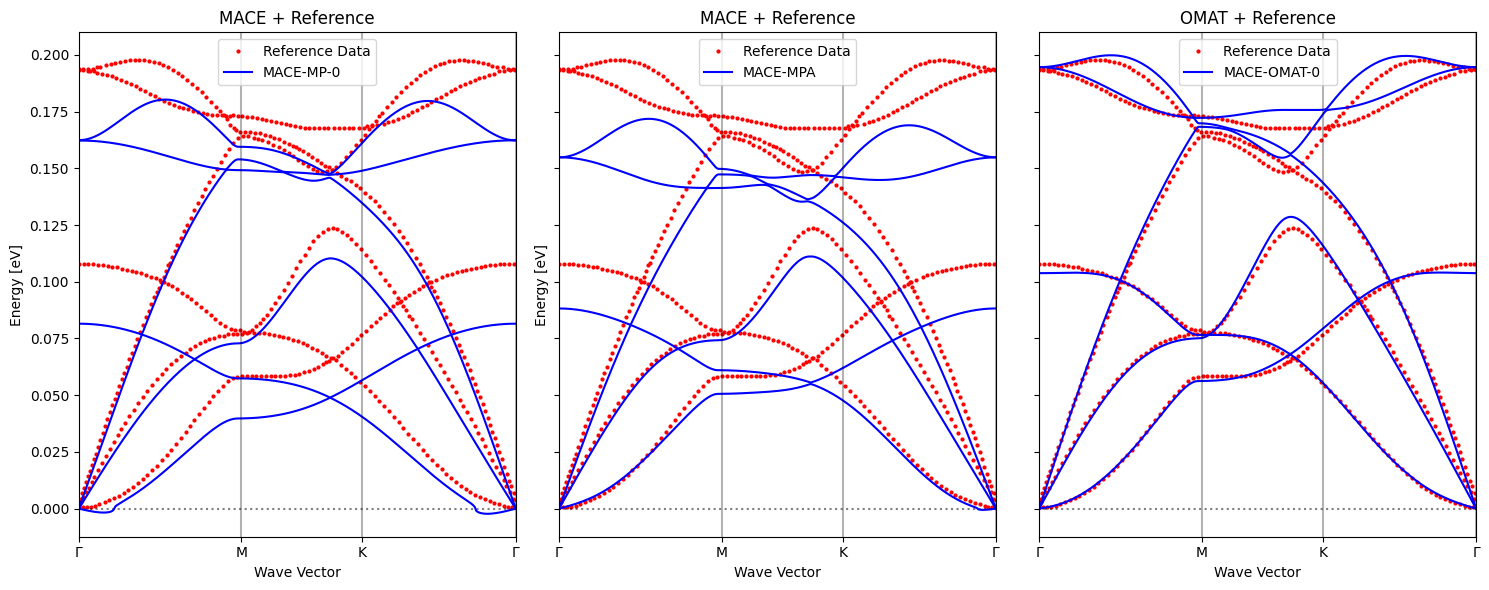

In [197]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# reference
for mode in range(len(x_norm)):
    extracted_y = np.array(values_y_graphene[mode])
    extracted_y_eV = extracted_y * 4.135667696e-3
    axes[0].plot(x_norm[mode], extracted_y_eV, color="red", label="Reference Data" if mode == 0 else "", linestyle='', marker='o', markersize=2) 
    axes[1].plot(x_norm[mode], extracted_y_eV, color="red", label="Reference Data" if mode == 0 else "", linestyle='', marker='o', markersize=2) 
    axes[2].plot(x_norm[mode], extracted_y_eV, color="red", label="Reference Data" if mode == 0 else "", linestyle='', marker='o', markersize=2) 


# Left subplot: MP0
axes[0].set_ylabel('Energy [eV]')
axes[0].set_xlabel('Wave Vector')
axes[0].axhline(y=0, color='k', ls=':', alpha=0.5)
axes[0].set_title("MACE + Reference")

for i, freq in enumerate(frequencies_g_macemp0):
    axes[0].plot(range(npoints), freq, label="MACE-MP-0" if i == 0 else "", color="blue")


# middle: MPA
axes[1].set_ylabel('Energy [eV]')
axes[1].set_xlabel('Wave Vector')
axes[1].axhline(y=0, color='k', ls=':', alpha=0.5)
axes[1].set_title("MACE + Reference")

for i, freq in enumerate(frequencies_g_mace):
    axes[1].plot(range(npoints), freq, label="MACE-MPA" if i == 0 else "", color="blue")


# Right subplot: OMAT
axes[2].set_xlabel('Wave Vector')
axes[2].axhline(y=0, color='k', ls=':', alpha=0.5)
axes[2].set_title("OMAT + Reference")

for i, freq in enumerate(frequencies_g_omat):
    axes[2].plot(range(npoints), freq, label="MACE-OMAT-0" if i == 0 else "", color="blue")


# Add vertical lines and ticks for special points
x_positions = [0]
for i in range(len(path_segments) - 1):
    k1 = special_points[path_segments[i]]
    k2 = special_points[path_segments[i + 1]]
    x_positions.append(x_positions[-1] + np.linalg.norm(np.array(k1) - np.array(k2)))
x_positions = np.array(x_positions) * (npoints - 1) / max(x_positions)

for ax in axes:
    ax.set_xticks(x_positions)
    ax.set_xticklabels(path_labels)
    ax.set_xlim(0, npoints - 1)
    for x in x_positions:
        ax.axvline(x, color='k', ls='-', alpha=0.3)
        
axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.tight_layout()
plt.show()
